# Trabajo Final
## Integrantes:


*   Jarol Andres Hernandez Rincón - 20162005862
*   Miguel Esteban Pinilla Leal - 20191005036





# Punto Cero: Selección de dataset

## Enlace de Alojamiento del Dataset Images

https://www.kaggle.com/code/sc0v1n0/animals-images-classification/input

Para un mejor procesamiento de las imagenes y funcionamiento del colab debido al tiempo de procesamiento, se opto por realizar una selección de solo 5 imagenes de todo el dataset que se selecciono siendo este el de la carpeta cats, que se puede descargar del comprimido que esta en el enlace anterior

## Clonación de repositorio para imagenes persistentes

In [1]:
%mkdir base_files

In [2]:
%cd base_files

/content/base_files


In [3]:
# Clonar el repositorio desde GitHub
!git clone https://github.com/MiguelPinillaUD/BigData/

Cloning into 'BigData'...
remote: Enumerating objects: 200, done.
remote: Counting objects: 100% (200/200), done.
remote: Compressing objects: 100% (196/196), done.
remote: Total 200 (delta 36), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (200/200), 147.88 MiB | 25.77 MiB/s, done.
Resolving deltas: 100% (36/36), done.


In [4]:
# Cambiar al directorio del repositorio
%cd BigData/

/content/base_files/BigData


In [5]:
%cd ProyFinal_continuacion/

/content/base_files/BigData/ProyFinal_continuacion


In [6]:
%cd images

/content/base_files/BigData/ProyFinal_continuacion/images


## Redimensionamiento de las imagenes

In [7]:
import os
from PIL import Image



# Directorios
input_folder = '/content/base_files/BigData/ProyFinal_continuacion/images'  # Ruta a la carpeta de entrada con las imágenes originales
output_folder = '/content/images'  # Ruta a la carpeta de salida para guardar imágenes redimensionadas

# Crear la carpeta de salida si no existe
os.makedirs(output_folder, exist_ok=True)

# Tamaño objetivo
target_size = (128, 128)

# Función para redimensionar y mantener la proporción con relleno
def resize_with_padding(image, target_size):
    # Obtener dimensiones originales
    original_width, original_height = image.size

    # Calcular proporciones
    ratio = min(target_size[0] / original_width, target_size[1] / original_height)
    new_width = int(original_width * ratio)
    new_height = int(original_height * ratio)

    # Redimensionar imagen manteniendo proporción
    resized_image = image.resize((new_width, new_height), Image.Resampling.LANCZOS)

    # Crear una nueva imagen con fondo negro (o blanco) del tamaño objetivo
    new_image = Image.new("RGB", target_size, (0, 0, 0))  # Fondo negro
    # Si prefieres fondo blanco, cambia (0, 0, 0) por (255, 255, 255)

    # Pegar la imagen redimensionada centrada en la nueva imagen
    top_left_x = (target_size[0] - new_width) // 2
    top_left_y = (target_size[1] - new_height) // 2
    new_image.paste(resized_image, (top_left_x, top_left_y))

    return new_image

# Procesar todas las imágenes en la carpeta de entrada
for image_file in os.listdir(input_folder):
    if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(input_folder, image_file)

        # Cargar la imagen
        with Image.open(image_path) as img:
            # Redimensionar manteniendo aspecto
            resized_img = resize_with_padding(img, target_size)

            # Guardar la imagen redimensionada en la carpeta de salida
            output_path = os.path.join(output_folder, image_file)
            resized_img.save(output_path)

print(f"Redimensionamiento completo. Imágenes guardadas en {output_folder}")

Redimensionamiento completo. Imágenes guardadas en /content/images


# Primer Punto: Grounding DINO

## Importación del Módelo Grounding Dino

In [8]:
%cd /content/base_files

/content/base_files


In [9]:
!git clone https://github.com/IDEA-Research/GroundingDINO.git

Cloning into 'GroundingDINO'...
remote: Enumerating objects: 463, done.
remote: Counting objects: 100% (240/240), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 463 (delta 175), reused 136 (delta 136), pack-reused 223 (from 1)
Receiving objects: 100% (463/463), 12.87 MiB | 39.35 MiB/s, done.
Resolving deltas: 100% (241/241), done.


In [10]:
%cd GroundingDINO/

/content/base_files/GroundingDINO


In [11]:
!pip install -q -e .

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.8/427.8 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 15.0 MB/s eta 0:00:00


In [12]:
!pip install supervision

In [13]:
%cd ..
!mkdir weights
!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth -P weights

/content/base_files


In [14]:
!pip install -q git+https://github.com/IDEA-Research/GroundingDINO.git
!pip install torch torchvision

  Preparing metadata (setup.py) ... done


In [15]:
!pip uninstall -y tensorflow && pip install tensorflow-cpu

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.0/230.0 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.3/381.3 kB 18.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: ke

In [16]:
from groundingdino.util.inference import load_model, load_image, predict, annotate

model_config_path = "/usr/local/lib/python3.10/dist-packages/groundingdino/config/GroundingDINO_SwinT_OGC.py"
# if you cloned the repository, it would look like "/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py"
model = load_model(model_config_path,
                   "weights/groundingdino_swint_ogc.pth")

final text_encoder_type: bert-base-uncased


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

## Configuración del módelo Grounding Dino

Procesando: /content/images/54_cat.png


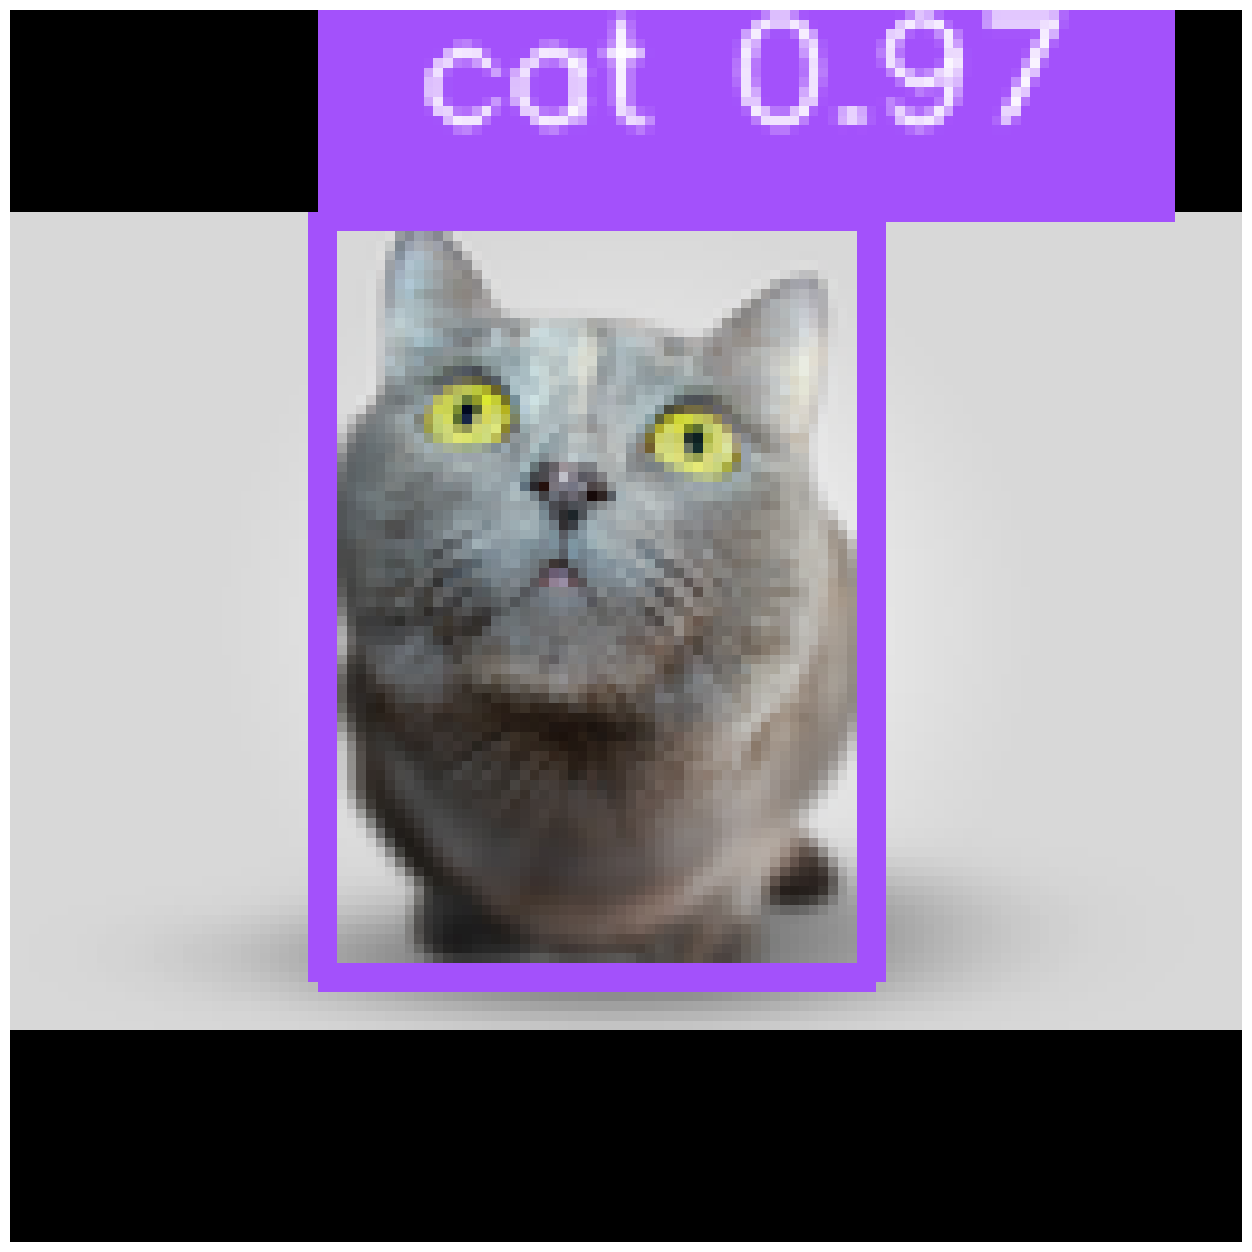

Etiquetas YOLO guardadas en: /content/detection/54_cat.txt
Procesando: /content/images/175_cat.png


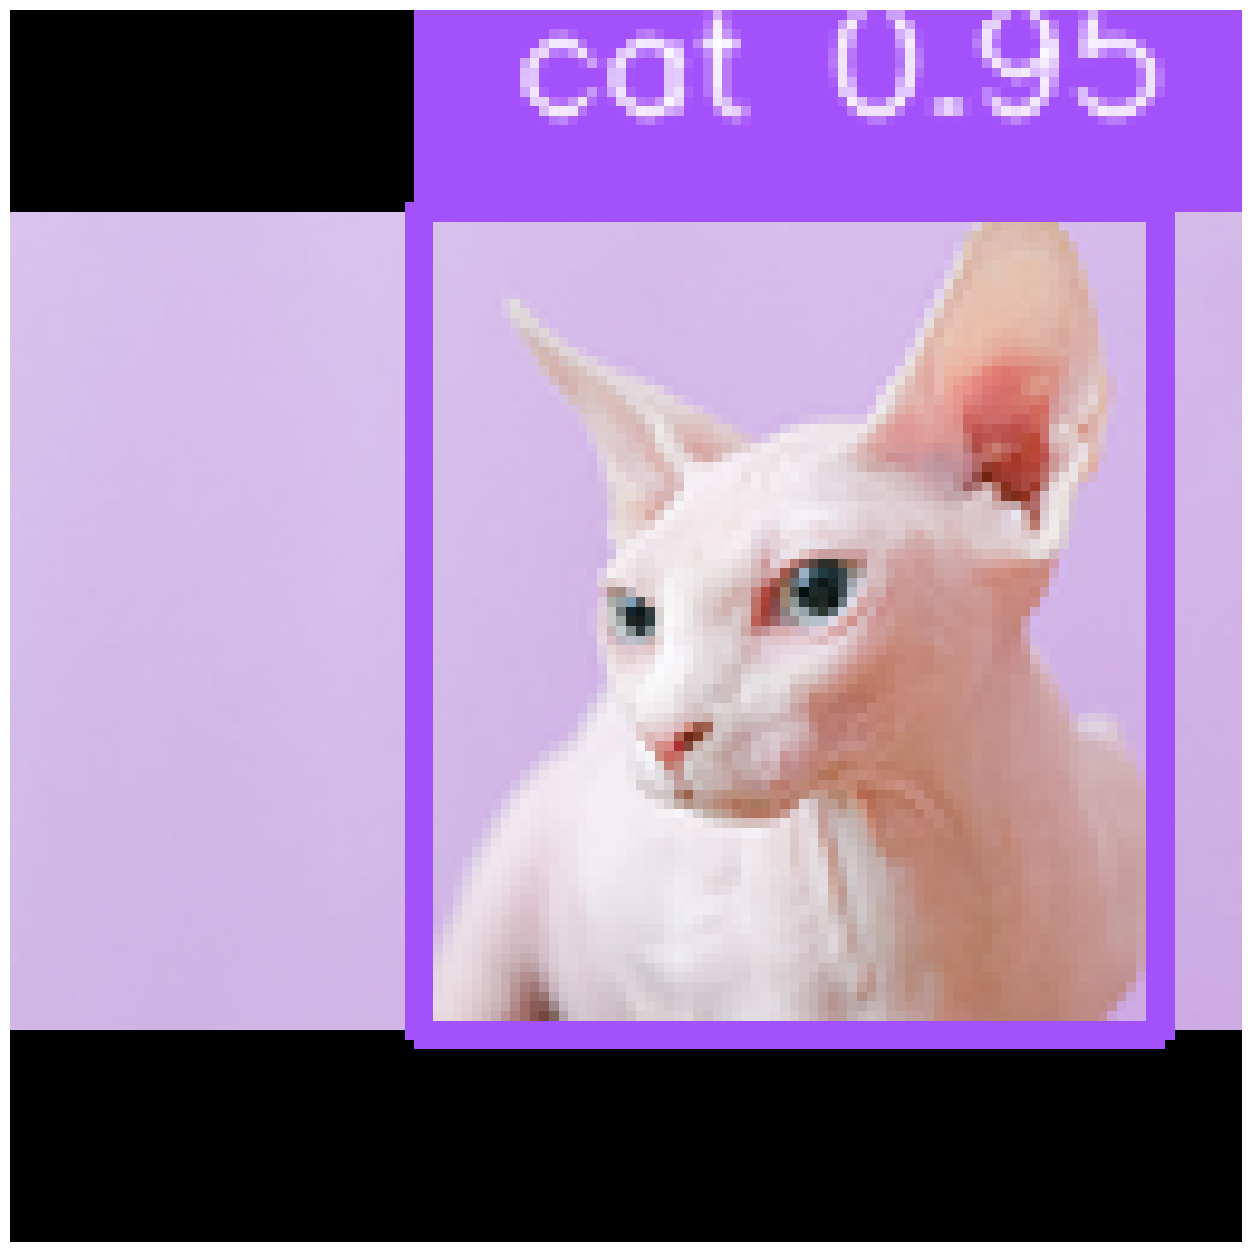

Etiquetas YOLO guardadas en: /content/detection/175_cat.txt
Procesando: /content/images/36_cat.png


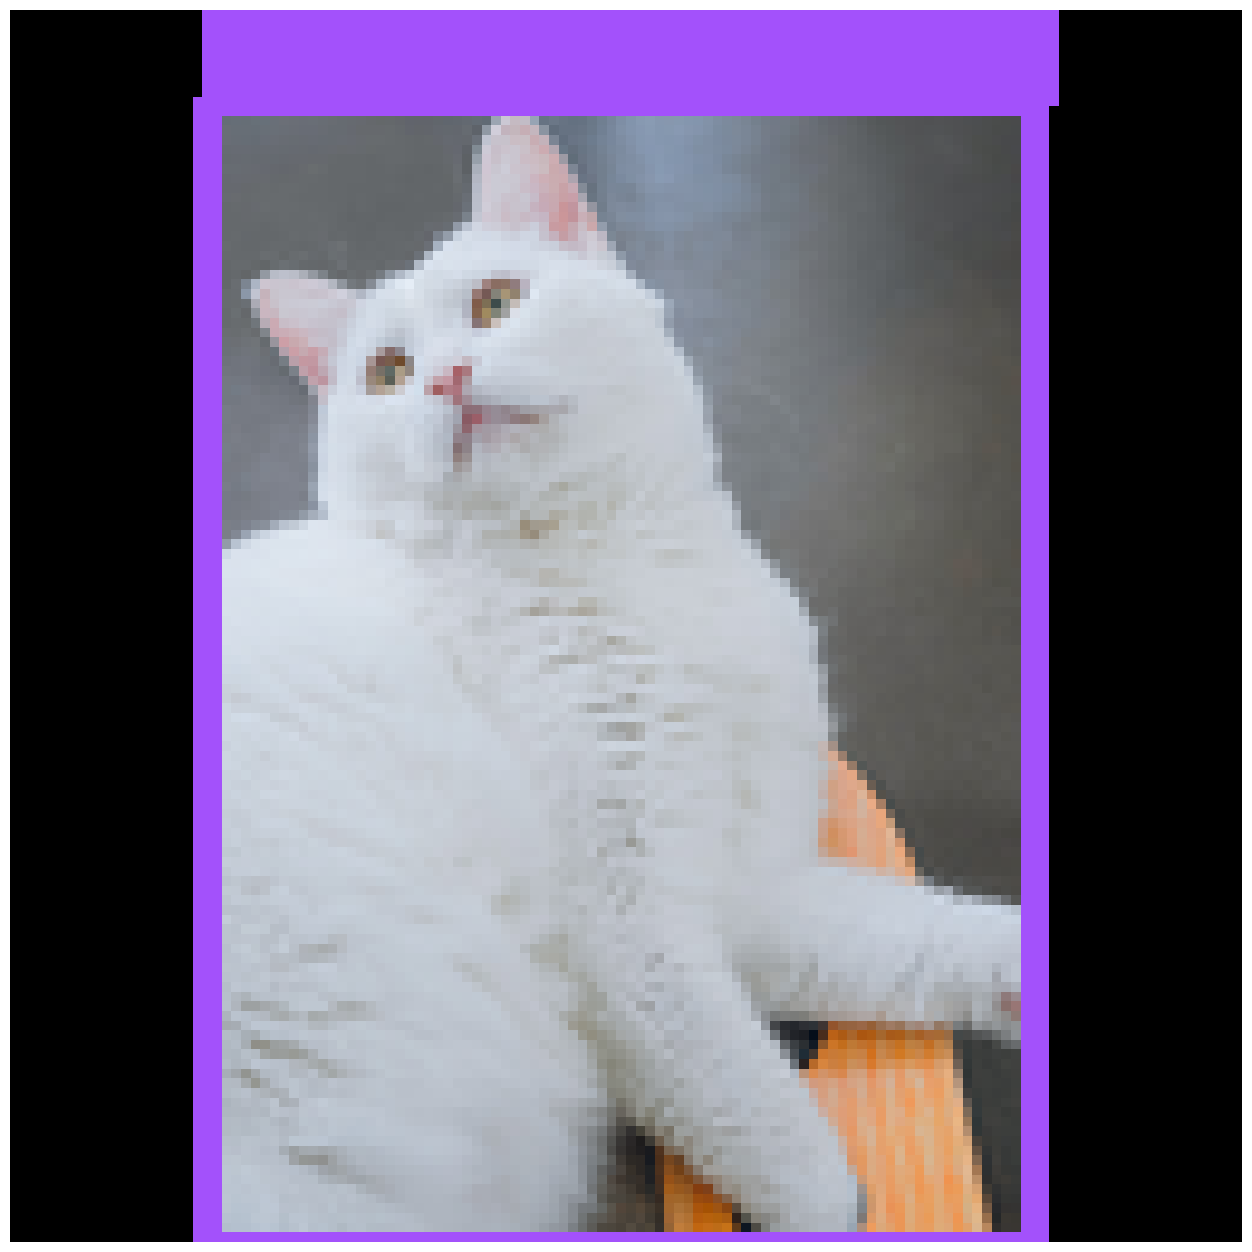

Etiquetas YOLO guardadas en: /content/detection/36_cat.txt
Procesando: /content/images/59_cat.png


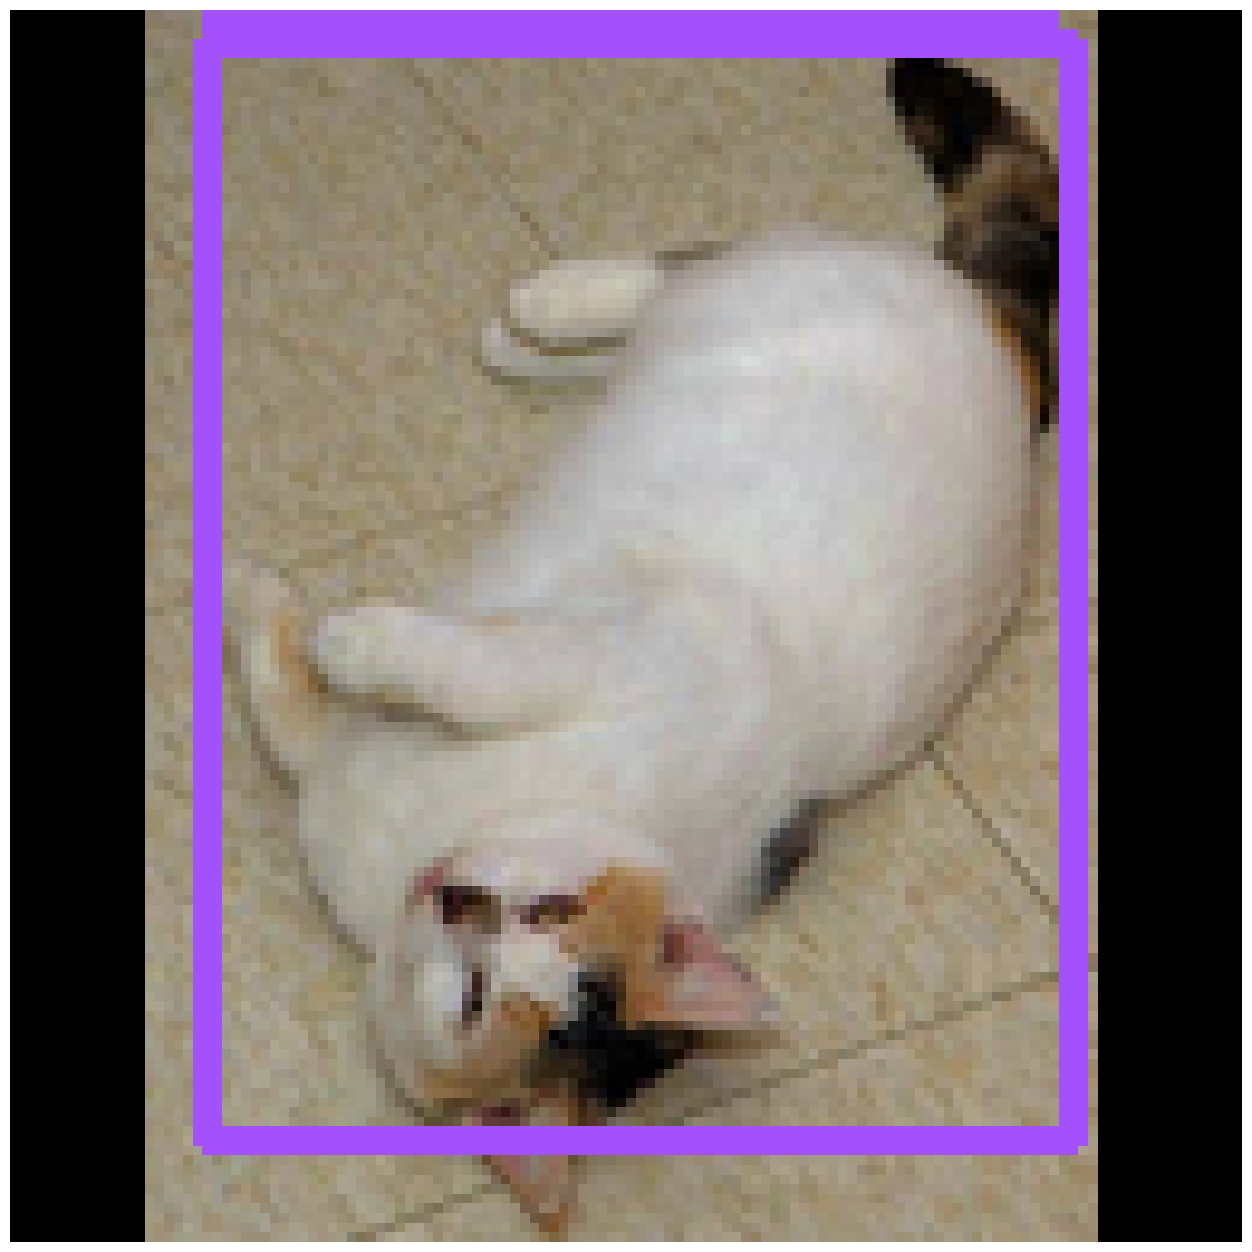

Etiquetas YOLO guardadas en: /content/detection/59_cat.txt
Procesando: /content/images/173_cat.png


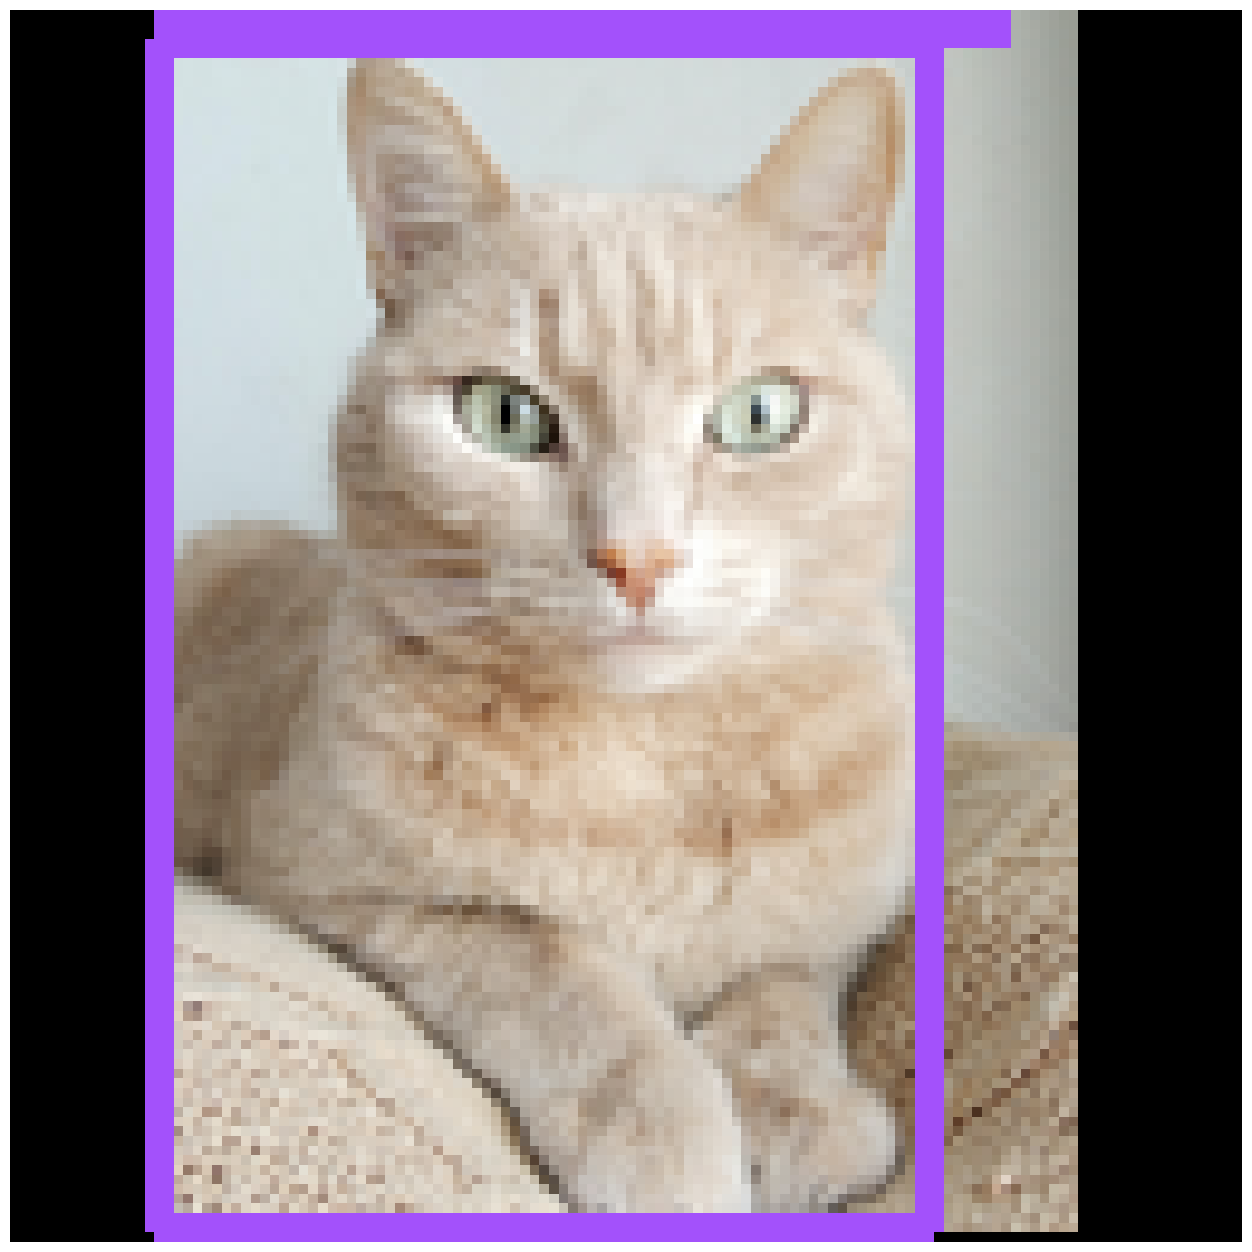

Etiquetas YOLO guardadas en: /content/detection/173_cat.txt


In [17]:
import os
import torch
import supervision as sv

# Configuración
image_folder = "/content/images"  # Carpeta de imágenes
output_folder = "/content/detection"  # Carpeta de salida para las etiquetas YOLO
label_text = "Cat"  # Etiqueta de la clase
label_class_id = 0  # ID de la clase (en YOLO, las clases se representan con índices numéricos)
BOX_THRESHOLD = 0.26
TEXT_TRHESHOLD = 0.30

# Asegúrate de que la carpeta de salida exista
os.makedirs(output_folder, exist_ok=True)

# Función para guardar etiquetas en formato YOLO
def save_yolo_labels(output_path, boxes, class_id, image_source):
    with open(output_path, "w") as f:
        for box in boxes:
            # Calcular las coordenadas normalizadas
            x_center = (box[0] + box[2]) / 2  # (x_min + x_max) / 2
            y_center = (box[1] + box[3]) / 2  # (y_min + y_max) / 2
            width = box[2] - box[0]  # x_max - x_min
            height = box[3] - box[1]  # y_max - y_min

            # Normalizar valores (YOLO espera valores entre 0 y 1)
            img_width, img_height = image_source.shape[1], image_source.shape[0]
            x_center /= img_width
            y_center /= img_height
            width /= img_width
            height /= img_height

            # Guardar en formato YOLO: class_id x_center y_center width height
            f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

# Función para procesar todas las imágenes en la carpeta
def process_images(image_folder, output_folder, model):
    # Recorrer todas las imágenes en la carpeta
    for filename in os.listdir(image_folder):
        image_path = os.path.join(image_folder, filename)
        if image_path.lower().endswith(('.png', '.jpg', '.jpeg')):  # Verificar que es una imagen
            print(f"Procesando: {image_path}")

            # Cargar imagen y realizar predicción
            image_source, image = load_image(image_path)  # Asumiendo que esta función existe
            boxes, logits, phrases = predict(
                model=model,
                image=image,
                caption=label_text,
                box_threshold=BOX_THRESHOLD,
                text_threshold=TEXT_TRHESHOLD,
                device="cpu"
            )

            # Anotar imagen
            annotated_frame = annotate(
                image_source=image_source,
                boxes=boxes,
                logits=logits,
                phrases=phrases
            )

            # Guardar etiquetas en formato YOLO
            output_label_path = os.path.join(output_folder, os.path.splitext(filename)[0] + ".txt")
            save_yolo_labels(output_label_path, boxes, label_class_id, image_source)

            # Mostrar imagen anotada (opcional)
            sv.plot_image(annotated_frame, (16, 16))

            print(f"Etiquetas YOLO guardadas en: {output_label_path}")

# Llamar a la función para procesar las imágenes
process_images(image_folder, output_folder, model)


# Segundo Punto: Segment Anything Model (SAM)

In [18]:
using_colab = True

In [19]:
if using_colab:
    import torch
    import torchvision
    print("PyTorch version:", torch.__version__)
    print("Torchvision version:", torchvision.__version__)
    print("CUDA is available:", torch.cuda.is_available())
    import sys
    !{sys.executable} -m pip install opencv-python matplotlib
    !{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

    !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

PyTorch version: 2.5.1+cpu
Torchvision version: 0.20.1+cpu
CUDA is available: False
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-4sewk7up
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-4sewk7up
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=b48369ec70824550a024e0e11148457e8ec5b0d82976b2491f13749ca6cd0410
  Stored in directory: /tmp/pip-ephem-wheel-cache-sbmn77dh/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment_anything
--2024-11-27 05:14:10--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.238.176.115, 18.238.176.126, 1

In [21]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import os

def show_anns(anns, image):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:, :, 3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

# Inicializar el modelo
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"
device = "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

# Carpetas de entrada y salida
input_folder = "/content/images"
output_folder = "/content/segmentation"
os.makedirs(output_folder, exist_ok=True)

# Procesar cada imagen en la carpeta
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_mask.png")

        # Leer la imagen
        image = cv2.imread(input_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Generar máscaras
        masks = mask_generator.generate(image)

        # Crear la figura y dibujar las máscaras
        plt.figure(figsize=(20, 20))
        plt.imshow(image)
        show_anns(masks, image)
        plt.axis('off')

        # Guardar la figura
        plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
        plt.close()

        print(f"Máscara guardada en: {output_path}")

print("Procesamiento completado.")


Máscara guardada en: /content/segmentation/54_cat_mask.png
Máscara guardada en: /content/segmentation/175_cat_mask.png
Máscara guardada en: /content/segmentation/36_cat_mask.png
Máscara guardada en: /content/segmentation/59_cat_mask.png
Máscara guardada en: /content/segmentation/173_cat_mask.png
Procesamiento completado.
